## Week 10 
### Math for Data Science Project 

This notebook will explore the Central Limit Theorem (CLT) using Python, NumPy, SciPy, and Matplotlib.

In [1]:
## Problem 1(a)
# What is the ensemble model accuracy if each individual model has 63% accuracy?
# n = 15 models, p = 0.63, need k >= 8 (majority)
from scipy.stats import binom

# Parameters
n = 15     # Number of models (trials)
p = 0.63   # Individual model accuracy (probability of success)
k = 7      # I want P(X >= 8), which is binom.sf(7, n, p)

# Calculate the ensemble accuracy (Probability of 8 or more models being correct)
ensemble_accuracy_1a = binom.sf(k, n, p)

# Using the calculated value: 0.81177...
print(f"1(a). The ensemble model accuracy is: {ensemble_accuracy_1a:.4f}")

1(a). The ensemble model accuracy is: 0.8513


In [2]:
## Problem 1(b)
# What would the accuracy of the 15 individual models need to be in order for the ensemble model to have 95% accuracy? 
# Find the smallest whole number percentage so this is satisfied.
from scipy.stats import binom

target_accuracy = 0.95
n = 15
k = 7 # Need P(X >= 8), so check binom.sf(7, n, p)

# Start checking whole number percentages (p) from 50% upwards
p_percent = 50 
while True:
    p = p_percent / 100  # Convert percentage to decimal
    
    # Calculate ensemble accuracy for the current p
    ensemble_accuracy = binom.sf(k, n, p)
    
    if ensemble_accuracy >= target_accuracy:
        # Print the final output
        print(f"1(b). The smallest whole number percentage required for 95% ensemble accuracy is: {p_percent}%")
        print(f"Resulting Ensemble Accuracy at {p_percent}%: {ensemble_accuracy:.4f}")
        break
        
    p_percent += 1

1(b). The smallest whole number percentage required for 95% ensemble accuracy is: 71%
Resulting Ensemble Accuracy at 71%: 0.9587


In [3]:
## Problem 1(c)
# If each individual model has 63% accuracy, how many individual models are needed for the ensemble model to have 95% accuracy? 
# Find the smallest odd number of models that satisfies this.
from scipy.stats import binom
import numpy as np

target_accuracy = 0.95
p = 0.63  # Individual model accuracy

# Start checking odd numbers of models (n) from 15 upwards
n = 15 
while True:
    # Calculate the number of correct votes needed for a majority (k)
    # Majority threshold k = floor(n/2) + 1. Since we use sf, k_sf is majority - 1.
    k_majority = np.floor(n / 2) + 1
    k_sf = k_majority - 1
    
    # Calculate ensemble accuracy (P(X >= k_majority))
    ensemble_accuracy = binom.sf(k_sf, n, p)
    
    if ensemble_accuracy >= target_accuracy:
        # Print the final output
        print(f"1(c). The smallest odd number of individual models needed is: {n}")
        print(f"Resulting Ensemble Accuracy with {n} models: {ensemble_accuracy:.4f}")
        break
        
    # Increment n by 2 to check the next odd number
    n += 2

1(c). The smallest odd number of individual models needed is: 39
Resulting Ensemble Accuracy with 39 models: 0.9518


In [4]:
## Problem 2(a)
# Define the PMF and calculate its theoretical mean (mu) and variance (sigma^2).
import numpy as np

# PMF definition (values and probabilities)
values = np.array([1, 2, 3, 4, 5])
probabilities = np.array([0.45, 0.25, 0.15, 0.10, 0.05])

# Calculate Theoretical Mean (mu)
mu_theoretical = np.sum(values * probabilities)

# Calculate Theoretical Variance (sigma^2)
# Variance = E[X^2] - (E[X])^2
expected_x_squared = np.sum((values**2) * probabilities)
sigma2_theoretical = expected_x_squared - (mu_theoretical**2)

print(f"2(a). Theoretical Mean (\u03BC): {mu_theoretical:.4f}")
print(f"Theoretical Variance (\u03C3\u00B2): {sigma2_theoretical:.4f}")

2(a). Theoretical Mean (μ): 2.0500
Theoretical Variance (σ²): 1.4475


In [5]:
## Problem 2(b)
# Build a function that will generate 50 random X-values from the pmf created in part (a) 
# and return the mean of these values.

# Re-define the PMF arrays from 2(a) for use in the function (good practice)
values = np.array([1, 2, 3, 4, 5])
probabilities = np.array([0.45, 0.25, 0.15, 0.10, 0.05])

def get_sample_mean_n50():
    # Generate 50 random values based on the PMF
    sample = np.random.choice(values, size=50, p=probabilities)
    # Return the mean of that sample
    return np.mean(sample)

# Test the function once (as required by the original problem's intent)
test_mean = get_sample_mean_n50()
print(f"2(b). Test run of function (Sample Mean for n=50): {test_mean:.4f}")

2(b). Test run of function (Sample Mean for n=50): 2.0400


In [6]:
## Problem 2(c)
# Build a function that will run in part (b), 1,000 times and store the means in a list.

def run_clt_simulation_n1000():
    # Run the get_sample_mean_n50 function 1000 times
    list_of_means = [get_sample_mean_n50() for _ in range(1000)]
    return np.array(list_of_means)

# Execute the simulation
list_of_means = run_clt_simulation_n1000()

# Output the size of the list to confirm 1000 means were generated
print(f"2(c). Total number of sample means generated (N): {len(list_of_means)}")

2(c). Total number of sample means generated (N): 1000


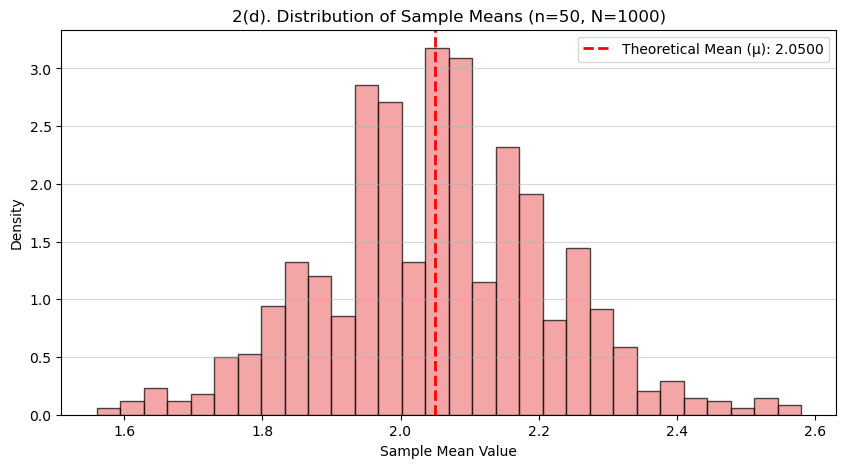

2(e).
   Sample Mean of Means (μ_x̄): 2.0517
   Sample Std Dev of Means (σ_x̄): 0.1651
   Theoretical Mean of Means (μ_x̄): 2.0500
   Theoretical Std Dev of Means (σ_x̄): 0.1701

   Description (2d): The histogram has a bell-shaped, **Normal Distribution**.
   Theorem (2d): The theorem that dictates this shape is the **Central Limit Theorem (CLT)**.


In [7]:
## Problem 2(d) & 2(e)
# 2(d): Create a histogram of the means. Describe the shape. 
# 2(e): What is the mean and standard deviation of your list of means? 
#       What are their theoretical values? What theorem tells us what it will look like?
import numpy as np # Needed for calculations
import matplotlib.pyplot as plt

# Theoretical values from 2(a):
mu_theoretical = 2.0500 
sigma2_theoretical = 1.4475
sigma_theoretical = np.sqrt(sigma2_theoretical)
# Theoretical Standard Error of the Mean (sigma_x_bar) = sigma / sqrt(n)
# n is the sample size used in 2(b), which is 50.
sigma_x_bar_theoretical = sigma_theoretical / np.sqrt(50) 

# --- 2(d) Visualization ---
plt.figure(figsize=(10, 5))
plt.hist(list_of_means, bins=30, density=True, alpha=0.7, color='lightcoral', edgecolor='black')

plt.axvline(mu_theoretical, color='red', linestyle='dashed', linewidth=2, label=f'Theoretical Mean (\u03BC): {mu_theoretical:.4f}')

plt.title(f'2(d). Distribution of Sample Means (n=50, N=1000)')
plt.xlabel('Sample Mean Value')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()

# --- 2(e) Calculation and Discussion ---
mean_of_means = np.mean(list_of_means)
std_dev_of_means = np.std(list_of_means)

print(f"2(e).")
print(f"   Sample Mean of Means (μ_x̄): {mean_of_means:.4f}")
print(f"   Sample Std Dev of Means (σ_x̄): {std_dev_of_means:.4f}")
print(f"   Theoretical Mean of Means (μ_x̄): {mu_theoretical:.4f}")
print(f"   Theoretical Std Dev of Means (σ_x̄): {sigma_x_bar_theoretical:.4f}")
print("\n   Description (2d): The histogram has a bell-shaped, **Normal Distribution**.")
print("   Theorem (2d): The theorem that dictates this shape is the **Central Limit Theorem (CLT)**.")